# CSIT 356: Lab 4: Data Visualization
## [Mohammed Al-Shalchy]


### Instruction

There is one dataset in this assignment: the olympics dataset (olympics.csv), which is derrived from the Wikipedia entry on All Time Olympic Games Medals, and does some basic data cleaning. It statistics the number of Summer/Winter Olympics each country has attended and the number of medals it has won.  

The columns are organized as **SummerNumber** (The number of Summer Olympics the country has joined), **SummerGold** (the number of Gold medals), **SummerSilver** (the number of Silver medals), **SummerBronze** (the number of Bronze medals), **SummerTotal** (the number of total medals), **WinterNumber**, **WinterGold**, **WinterSilver**, **WinterBronze**, **WinterTotal**.
Use this dataset to answer the questions below.

In [1]:
# Don't delete this cell
# Execute this cell to import pandas, numpy, matplotlib.pyplot, seaborn, and load data to DataFrames.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 10


olympics = pd.read_csv("olympics.csv",thousands=',', index_col="Country")
olympics

,SummerNumber,SummerGold,SummerSilver,SummerBronze,SummerTotal,WinterNumber,WinterGold,WinterSilver,WinterBronze,WinterTotal,CombinedNumber,CombinedGold,CombinedSilver,CombinedBronze,CombinedTotal
Country,,,,,,,,,,,,,,,
Afghanistan,14,0,0,2,2,0,0,0,0,0,14,0,0,2,2
Algeria,13,5,4,8,17,3,0,0,0,0,16,5,4,8,17
Argentina,24,21,25,28,74,19,0,0,0,0,43,21,25,28,74
Armenia,6,2,6,6,14,7,0,0,0,0,13,2,6,6,14
Australasia,2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UnifiedTeam,1,45,38,29,112,1,9,6,8,23,2,54,44,37,135
IndependentOlympicAthletes,3,1,0,1,2,0,0,0,0,0,3,1,0,1,2
IndependentOlympicParticipants,1,0,1,2,3,0,0,0,0,0,1,0,1,2,3


## Question 1 (10 points)
Visulize the number of medals of top 10 Countries of the total number of medals in the summer olympics by a clustered bar plot.
  
#### Steps:   
1. Sort the olympics dataset by the values in the column 'SummerTotal' in descending order.
2. Select the first 10 rows of the sorted dataset and three columns: **SummerGold**, **SummerSilver**, and **SummerBronze**. Assign these 10 rows with three columns to a new DataFrame  **summer**.
3. Apply 'plot.bar()' to plot a clustered bar chart with title "Medals in Summer Olympics". The Axis-x shows different countries and the Axis-y indicates the number of medals. The lengend shows the three kinds of medals: "SummerGold", "SummerSilver", and "SummerBronze". The ticks in Axis-x should be rotated by 30 degree.


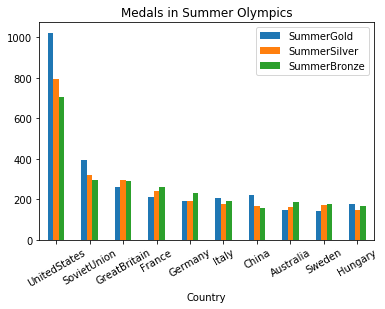

In [25]:
summer = olympics.sort_values(by="SummerTotal", ascending = False)[:10][["SummerGold", "SummerSilver", "SummerBronze"]]
summer.plot.bar(title= "Medals in Summer Olympics", rot=30)

## Question 2 (10 points)
Visulize the number of medals of top 10 Countries of the total number of medals in the winter olympics by a stacked stacked horizontal bar plot.

#### Steps:   
1. Sort the olympics dataset by the values in the column 'WinterTotal' in descending order.
2. Select the first 10 rows of the sorted dataset and three columns: **WinterGold**, **WinterSilver**, and **WinterBronze**. Assign these 10 rows with three columns to a new DataFrame  **winter**.
3. Apply 'plot.barh()' to plot a clustered bar chart with title "Medals in Winter Olympics". The Axis-y shows different countries and the Axis-x indicates the number of medals. The lengend shows the three kinds of medals: "WinterGold", "WinterSilver", and "WinterBronze". 

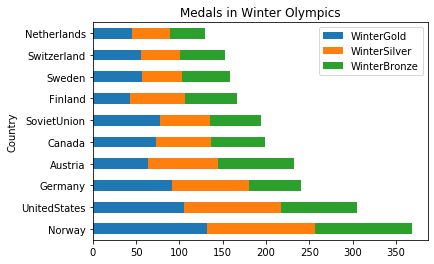

In [24]:
winter = olympics.sort_values(by="WinterTotal", ascending = False)[:10][["WinterGold", "WinterSilver", "WinterBronze"]]
winter.plot.barh(title= "Medals in Winter Olympics", stacked = 2)

## Question 3 (15 points)
Visualize the distribution of Gold, Silver, and Bronze medals in the summer Olympics for all countries by the box plot and bee swarm chart using Seaborn. The Axis-x indicates different kinds of medals and axis-y shows to number of medals. 
  
#### Steps:   
1. Create a new DataFrame called **melted** which is a copy of **summer**.
2. Set the index of DataFrame **melted** to be one column **Country**.
3. Apply 'melt' function in pandas to convert **melted** from 'wide' format to 'long' format.
4. Apply 'factorplot' function in Seaborn to draw the boxplot.
5. Apply 'swarmplot' function in Seaborn to draw the bee swarm chart.

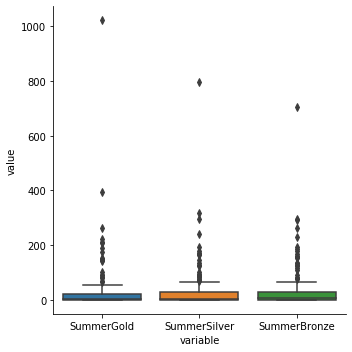

In [37]:
summerAll = olympics[["SummerGold", "SummerSilver", "SummerBronze"]]
melted = summerAll.reset_index()
melted = pd.melt(melted, id_vars = ["Country"])
sns.factorplot(x="variable", y= "value", kind= "box", data = melted)

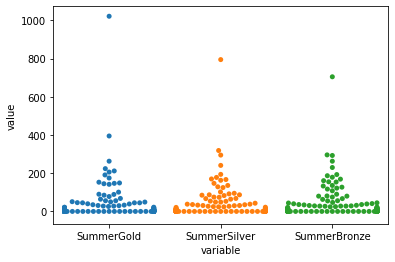

In [39]:
sns.swarmplot(x="variable", y= "value", data = melted)

## Question 4 (10 points)
Visualize the correlations of multiple columns in the Olympics for all countries by the scatter matrices and histogram/density plot using Seaborn. Two figures need to be created:
1. Create one scatter matrix with density plot to compare the correlations of 'SummerNumber', 'SummerTotal', 'WinterNumber', and 'WinterTotal'. 
2. Create one scatter matrix with histogram plot to compare the correlations of differnt kinds of medals in the winter Olympics ('WinterGold', 'WinterSilver', 'WinterBronze'). 
  
#### Tips:   
1. 'pairplot' function in the Seaborn should be used. 
2. Histogram/Density plot can be choosen by setting the argument 'diag_kind' to 'hist'/'kde'.

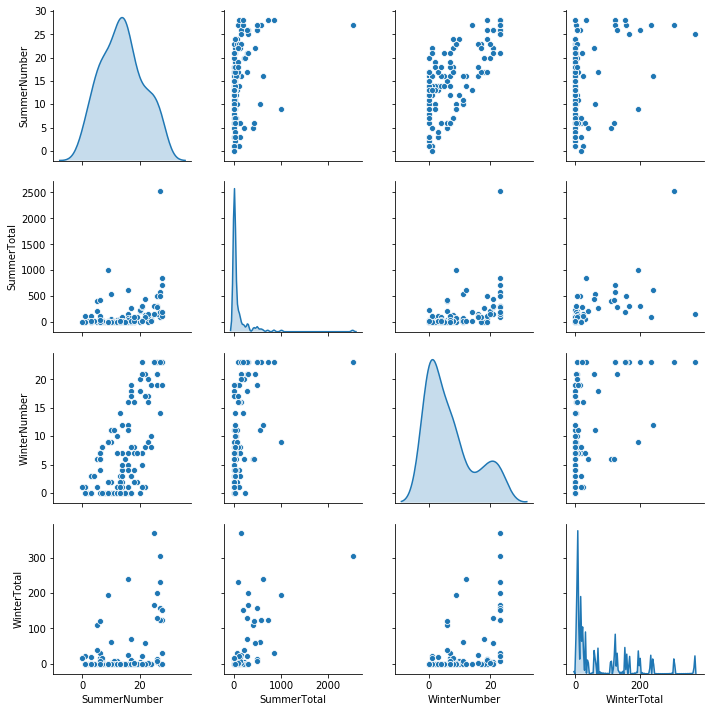

In [46]:
#Compare1 = olympics[["SummerNumber", "SummerTotal", "WinterNumber", "WinterTotal"]]
#Compare_1 = compare1.reset_index()
#melted = pd.melt(melted, id_vars = ["Country"])
sns.pairplot(olympics[["SummerNumber", "SummerTotal", "WinterNumber", "WinterTotal"]], diag_kind= "kde")

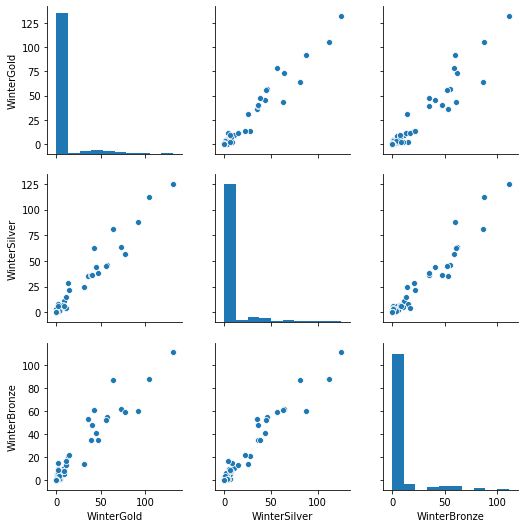

In [54]:
sns.pairplot(olympics[["WinterGold", "WinterSilver", "WinterBronze"]], diag_kind= "hist")

## Question 5 (5 points)
Describe the correlations of different variables indicated in the above two scatter matrices.


#### Please leave your answer here.

    For the first scatter matrices, the correlations between SummerNumber, SummerTotal, WinterNumber, and WinterTotal is extremely weak. The strongest correlation is between SummerNumber and WinterNumber (which is still relaitvely weak), which means that if a country is joining the summer olympics, they're somewhat likely to join the winter olympics. The correlation becomes stronger when the situation is flipped, meaning that if a country is joining the winter olympics, they're more likely to join the summer olympics. The weak correlations, including ones between SummerNumber and SummerTotal, and ones between WinterNumber and WinterTotals, mean that a team joining olympic events isn't correlated with winning a large number of total medals. Furthermore as the distribution in SummerTotal showcases a high distribution in the beginning, not in the middle, which implies that only a select number of countries that enter tend to win the most amount of medals. The same analysis for the summer olympics situation can be made for the winter olympics situation.
    For the second scatter matrices, the correlations between WinterGold, WinterSilver, and WinterBronze are quite strong. The strong correlations between all three conditions imply three different correlative conditions. First, if a country is to collect a bronze medal, they're extremely likely to also collect silver and gold medals. Second, if a country is to collect a silver medal, they're extremely likely to also collect bronze and gold medals. Third, if a country is to collect a gold medal, they're extremely likely to also collect bronze and silver medals. 